# Regularización

Hasta ahora, cuando ajustamos modelos lineales, seleccionamos el modelo que minimizaba el error cuadrático.
Para un modelo de la forma
$$y_i = f(x_i) + e_i$$
minimizamos la suma
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$
Este es un ejemplo de _funcion de costo_: una función que mide el "costo" de los errores de las predicciones de un modelo. Para aplicar la técnica de regularización, modificamos la función de costo, agregando un término que penaliza los modelos por su complejidad. Por ejemplo, podríamos tener una nueva función de costo de la forma:
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2 + \alpha \theta_i}$$
donde el vector $\theta$ corresponde a los parámetros de nuestro modelo y $\alpha$ es un hiper parámetro que controla cuán fuerte es la penalización. Un mayor valor de $\alpha$ significa una mayor penalización, ya que aumenta el costo, que es lo que buscamos minimizar.

Veamos un ejemplo clásico de  ajustar un polinomio a un set de datos pequeño.

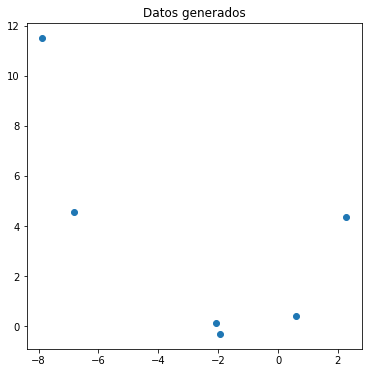

In [1]:
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
plt.rcParams['figure.figsize'] = 6,6

random.seed(5)

# Generamos un dataset de ejemplo
def generate_data():
    xs = np.arange(-3, 3, 1)
    data = [(2 * x - 3 * random.random(), (x - 3 * random.random()) * (x + random.random())) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    
    return xs, ys

xs, ys = generate_data()
plt.scatter(xs, ys)
plt.title("Datos generados")
plt.show()

Intentemos ahora ajustar un modelo. Si intentamos ajustar un polinomio de grado 4, obtendremos lo que llamamos un modelo sobreajustado.

In [2]:
xs

[-7.868705084669106,
 -6.8273508513311505,
 -2.087015684850844,
 -1.9469236594107726,
 0.5927928566535088,
 2.2781764362156975]

In [3]:
np.vander(xs, 4), ys

(array([[-4.87202833e+02,  6.19165197e+01, -7.86870508e+00,
          1.00000000e+00],
        [-3.18241391e+02,  4.66127196e+01, -6.82735085e+00,
          1.00000000e+00],
        [-9.09027745e+00,  4.35563447e+00, -2.08701568e+00,
          1.00000000e+00],
        [-7.37983698e+00,  3.79051174e+00, -1.94692366e+00,
          1.00000000e+00],
        [ 2.08309408e-01,  3.51403371e-01,  5.92792857e-01,
          1.00000000e+00],
        [ 1.18239359e+01,  5.19008787e+00,  2.27817644e+00,
          1.00000000e+00]]),
 [11.520909484008026,
  4.5474606036694905,
  0.13576647035349249,
  -0.3059619276753641,
  0.4018123953876509,
  4.346247756315739])

r^2: 0.9450313498052653


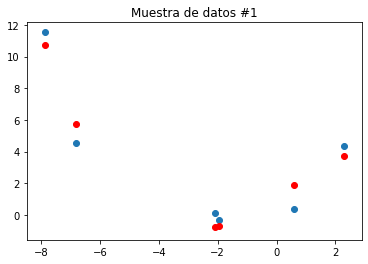

In [4]:
lm = linear_model.LinearRegression()

# Esta funcion de numpy genera la matriz polinomica a partir de una serie de valores
X = np.vander(xs, 4)[:,:-1]
y = ys

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(xs, ys)


plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')
print ("r^2:", model.score(X, y))

Si aplicamos este mismo modelo a una nueva muestra de datos generados por la misma funcion, veremos que no ajusta muy bien. Mejor dicho, vemos que ajusta notablemente peor.

r^2: 0.2528139681804915


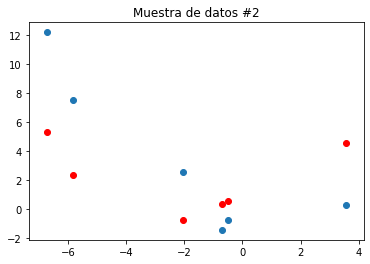

In [5]:
random.seed(3)

xs2, ys2 = generate_data()
X = np.vander(xs2, 4)[:,:-1]
predictions = lm.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos #2")
plt.scatter(xs2, predictions, c='r')
print ("r^2:", model.score(X, ys2))

In [6]:
# Veamos los coeficientes de la regresión lineal:    
lm.coef_

array([-0.03178629,  0.05382933,  1.17468542])

#  Ridge Regression
Usemos scikit-learn para ajustar una regresión con regularización, como la que describimos en el inicio del notebook. En particular, comenzaremos por la  _ridge regression_ en inglés. ¿Hace falta normalizar los features en este caso?

r^2: 0.7391497357318184


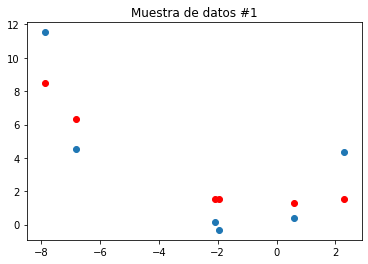

In [7]:
rlm = linear_model.Ridge(alpha=0.5, normalize=True)

# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs, 4)[:,:-1]
y = ys

ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

plt.scatter(xs, ys)

plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')
print ("r^2:", ridge_model.score(X, ys))

r^2: 0.5893608691876213


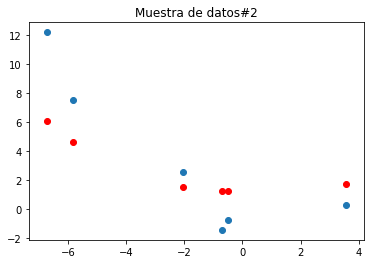

In [8]:
X = np.vander(xs2, 4)[:,:-1]
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos#2")
plt.scatter(xs2, predictions, c='r')

print ("r^2:", ridge_model.score(X, ys2))

In [9]:
# Veamos los coeficientes de la regresión Ridge:    
ridge_model.coef_

array([-0.0074712 ,  0.05984254,  0.0148505 ])

Deberían observar que el ajuste de la _ridge regression_ empeoró un poco (es decir, no fue tan bueno) en muestra #1. En cambio, la mejora fue notablemente grande en la muestra #2. Esto es porque la regularización busca prevenir el sobreajuste (overfitting).

Además podemos apreciar que los coeficientes de la regresión Ridge son más chicos.

Si quieren ver otro ejemplo de ridge regularization pueden leer [este ejemplo](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html) de la documentacion oficial de scikit-learn.

# Lasso



¿Hace falta normalizar los features en este caso? 

r^2: 0.6774247705250354


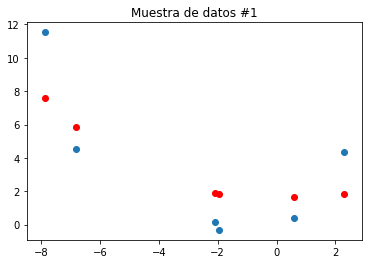

In [10]:
lasso = linear_model.Lasso(alpha=0.5, normalize=True)

# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs, 4)[:,:-1]
y = ys
lasso_model =lasso.fit(X, y)
predictions = lasso_model.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')

print ("r^2:", lasso_model.score(X, ys))

r^2: 0.5150989412359774


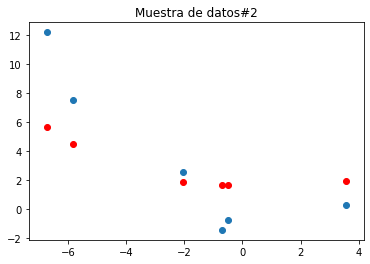

In [11]:
X = np.vander(xs2, 4)[:,:-1]
predictions = lasso_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos#2")
plt.scatter(xs2, predictions, c='r')

print ("r^2:", lasso_model.score(X, ys2))

In [12]:
# Veamos los coeficientes de la regresión Lasso:    
lasso_model.coef_

array([-0.00605141,  0.04889947, -0.        ])

# ElasticNet

¿Hace falta normalizar los features en este caso? 

r^2: 0.5540874979410444


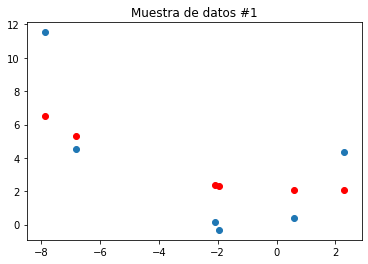

In [13]:
elastic_net = linear_model.ElasticNet(alpha=0.5, normalize=True)

# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs, 4)[:,:-1]
y = ys

elastic_net.fit(X, y)
predictions = elastic_net.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')

print ("r^2:", elastic_net.score(X, ys))

r^2: 0.42283146832685636


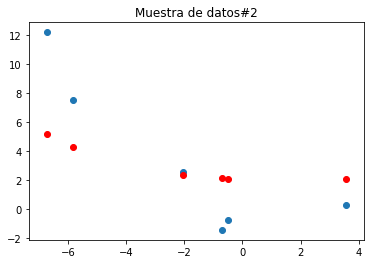

In [14]:
X = np.vander(xs2, 4)[:,:-1]
predictions = elastic_net.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos#2")
plt.scatter(xs2, predictions, c='r')
print ("r^2:", elastic_net.score(X, ys2))

In [15]:
# Veamos los coeficientes de la regresión ElasticNet:
elastic_net.coef_

array([-0.00408996,  0.03280451, -0.05583325])

# Optimizando el hiper parámetro $\alpha$ 

Habrán notado que en el ejemplo seteamos el _hiperparámetro_ $\alpha$ en 10. Esta fue una decisión arbitraria, y existen maneras de determinar este valor empíricamente.

En general, debemos decidir la forma de elegir el parámetro $\alpha$ y existen formas automáticas de hacerlo. Una forma de hacerlo es con _validacion-cruzada_ o _cross-validation_ en inglés. Para esta práctica guiada, exploremos el ridge model que viene con funcionalidad para hacer [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

Típicamente, el cross-validation funciona separando nuestro dataset entre datos para ajustar el modelo (training set) y datos para evaluar el modelo (testing set).

En este caso, el modelo que generamos con `RidgeCV` de scikit-learn, automáticamente prueba diferentes valores de $\alpha$. Ejecutá el siguiente código más de una vez. Deberías ver que elije diferentes valores de $\alpha$, ya que hace diferentes separaciones de los datos cada vez.

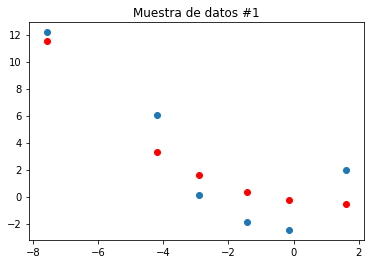

r^2: 0.8340460794375653
alpha: 0.31027027027027027


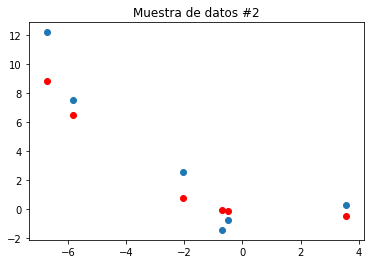

r^2: 0.8747545049879347


In [16]:
rlmcv = linear_model.RidgeCV(alphas=np.linspace(0.01,100, 1000), cv=3, normalize=True)
xs, ys = generate_data()

# Ajustamos nuevamente nuestro modelo, esta vez con RidgeCV
X = np.vander(xs, 4)[:,:-1]
y = ys
rlmcv.fit(X, y)
predictions = rlmcv.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')
plt.show()
print ("r^2:", rlmcv.score(X, ys))
print ("alpha:", rlmcv.alpha_)

X = np.vander(xs2, 4)[:,:-1]
predictions = rlmcv.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos #2")
plt.scatter(xs2, predictions, c='r')
plt.show()
print ("r^2:", rlmcv.score(X, ys2))

C:\Users\mbeati\AppData\Local\Continuum\anaconda3\envs\dsdh2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06375784186552136, tolerance: 0.011965845318814596
  tol, rng, random, positive)


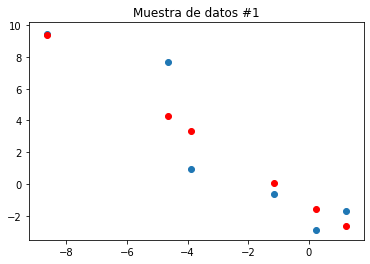

r^2: 0.8471516210059156
alpha: 0.11009009009009008


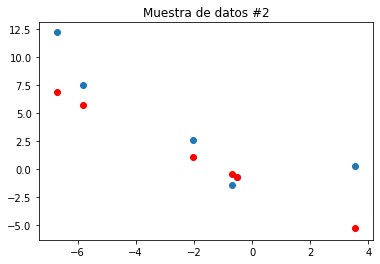

r^2: 0.5521606851520775


In [17]:
lassocv = linear_model.LassoCV(alphas=np.linspace(0.01,100, 1000), cv=3, normalize=True)
xs, ys = generate_data()

# Ajustamos nuevamente nuestro modelo, esta vez con RidgeCV
X = np.vander(xs, 4)[:,:-1]
y = ys
lassocv.fit(X, y)
predictions = lassocv.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')
plt.show()
print ("r^2:", lassocv.score(X, ys))
print ("alpha:", lassocv.alpha_)

X = np.vander(xs2, 4)[:,:-1]
predictions = lassocv.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos #2")
plt.scatter(xs2, predictions, c='r')
plt.show()
print ("r^2:", lassocv.score(X, ys2))